<a href="https://colab.research.google.com/github/DepartmentOfStatisticsPUE/cda-2021/blob/main/notebooks/cda_2021_03_09_lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
a <- 1:10
print(a)

 [1]  1  2  3  4  5  6  7  8  9 10


In [3]:
a*2+1

[1]  3  5  7  9 11 13 15 17 19 21

This is normal text and I can use it to comment my code and write answers.

## Excercise 1 

Assume that football player with success rate 0.4 shot 10 times on goal.Let X be a random variable denoting number of successful scores. Please find

+ Distribution of X 
+ Probability that football player score exactly 4 times (P(X=4))
+ Probability that football player score at least 7 times (P(X>=7) = 1−P(X<=6))

Point 1. Distribution of X? 

P(X=0), P(X=1), P(X=2),....,P(X=10)

In [4]:
dbinom(x = 0, size = 10, prob = 0.4) ## P(X = 0)

[1] 0.006046618

In [6]:
data.frame(x = 0:10, p_i = dbinom(x = 0:10, size = 10, prob = 0.4))

x,p_i
<int>,<dbl>
0,0.0060466176
1,0.0403107840
2,0.1209323520
3,0.2149908480
4,0.2508226560
5,0.2006581248
6,0.1114767360
7,0.0424673280
8,0.0106168320


Probability of scoring exactly 4 times (P(X=4)) is

In [7]:
dbinom(x = 4, size = 10, prob = 0.4)

[1] 0.2508227

Probability of scoring at least 7 times (P(X >= 7)) is 

In [10]:
1 - pbinom(q = 6, size = 10, prob = 0.4)

[1] 0.05476188

## Exercise 2 

Number of car accidents in one day in some city follows Poisson distribution with expected value $\lambda=2$. Find the probability that at most 4 car accidents happen.

P(X <= 4) = P(X=0)+P(X=1)+P(X=2)+P(X=3)+P(X=4)

In [13]:
ppois(q = 4, lambda = 2)

[1] 0.947347

In [14]:
ppois(4, 2)

[1] 0.947347

Probability that at most 4 car accidents will happen it this city is equal to 94.73%

## Pseudo-Random numbers in R

$$
\begin{cases}
X_1 & \sim N(4, 1.5)  \\
X_2 & \sim Exp(1) \\
\epsilon & \sim N(0,1) 
\end{cases}
$$

We will calculate the following variable

$$
Y = 2 + 2.5*X_1 - 3*X_2 + \epsilon
$$

In [17]:
set.seed(1)
N <- 100000
x1 <- rnorm(N, 4,  1.5) ## random variable from normal dist
x2 <- rexp(N, 1) ## random variable from exp dist
epsilon <- rnorm(N) ## random variable from normal dist
Y <- 2 + 2.5*x1 - 3*x2 + epsilon
head(Y)

[1]  8.068432 13.117475  7.945739 16.429954 11.839728  9.202053

Lets assume that probability of success is generated from the following function (it is called logit or logistic function)

$$
p = \frac{\exp(1 + 0.5*X_1 + 1*X_2)}{1 + \exp(1 + 0.5*X_1 + 1*X_2)}
$$

or

$$
logit(p) = 1 + 0.5*X_1 + 1*X_2
$$

where $X_1$ and $X_2$ are the same as above and then we generate variable $Y_2$ from Bernoulli distribution with $p$ as a parameter

$$
Y_2 \sim Bern(p)
$$


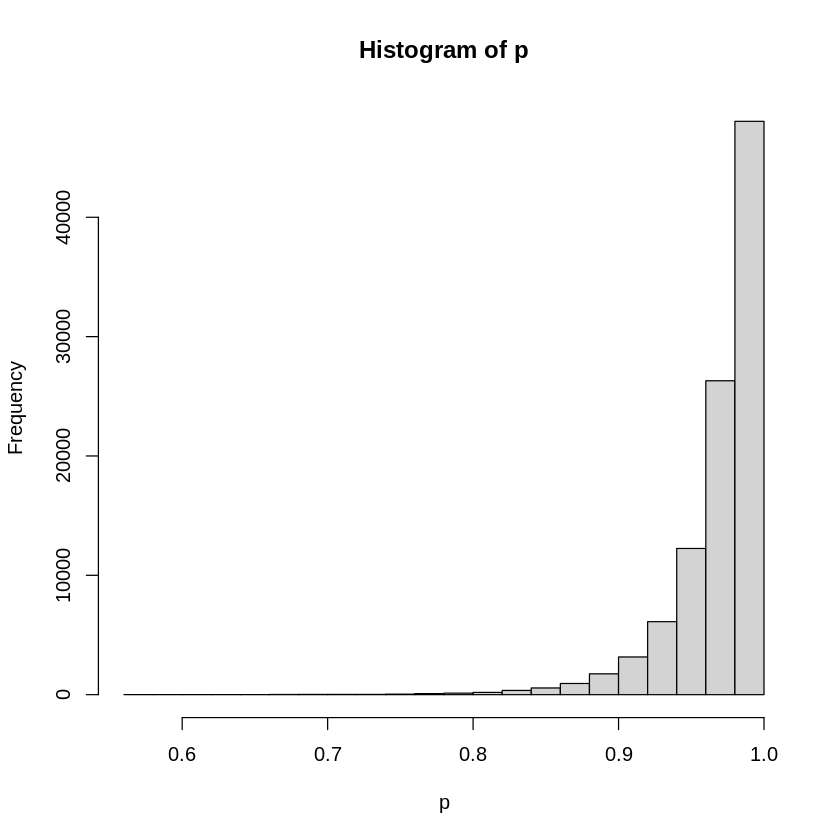

In [25]:
## we generate p according to the model above
p <- exp(1 + 0.5*x1 + 1*x2) / (1 + exp(1 + 0.5*x1 + 1*x2))

## plot p distribution
hist(p)


In [26]:
## we generate data from binomial distribution
set.seed(1)
Y_2 <- rbinom(n = length(p), size = 1, prob = p)

## we are checking the characteristics
length(Y_2)
table(Y_2)

## compare known (true) average of p with empirical p (ep - expected p)
c(p = mean(p), ep = mean(Y_2))

[1] 100000

Y_2
    0     1 
 3171 96829 

p        ep 
0.9691425 0.9682900

Lets assume that we have 100 days in a year and we would like to generate for each day numer of accidents according to Poisson distribution with $\lambda=2$. 

In [27]:
set.seed(123)
days_accidents <- rpois(n = 100, lambda = 2)
table(days_accidents) 

days_accidents
 0  1  2  3  4  5  6 
13 26 29 17 10  3  2 

In [28]:
mean(days_accidents)

[1] 2.02